Problem statement: Analysis and Visualization of Stock Market Data 
Tasks to Perform: 
1. Import the "Stock_Prices.csv" dataset. 
2. Explore the dataset to understand its structure and content. 
3. Ensure that the date column is in the appropriate format (e.g., datetime) for time series 
analysis. 
4. Plot line charts or time series plots to visualize the historical stock price trends over 
time. 
5. Calculate and plot moving averages or rolling averages to identify the underlying 
trends and smooth out noise. 
6. Perform seasonality analysis to identify periodic patterns in the stock prices, such as 
weekly, monthly, or yearly fluctuations. 
7. Analyze and plot the correlation between the stock prices and other variables, such as 
trading volume or market indices. 
8. Use autoregressive integrated moving average (ARIMA) models or exponential 
smoothing models to forecast future stock prices.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
stock_prices = pd.read_csv('stock_prices.csv')
stock_prices.head()

Date          A         AA      AAPL  ABBV        ABC       ABT  \
0  2003-07-31  13.790836  53.019848  1.019303   NaN  12.739487  9.022574   
1  2003-08-01  13.676599  51.759747  1.002379   NaN  12.579965  8.859362   
2  2003-08-04  13.682946  52.256149  1.025589   NaN  12.398233  8.850165   
3  2003-08-05  13.219654  51.206055  0.985455   NaN  12.111500  8.700747   
4  2003-08-06  13.060995  50.783653  0.949190   NaN  11.752071  8.873152   

         ACN       ADBE        ADI  ...       XEL         XL       XLNX  \
0  15.108545  16.333433  26.962475  ...  7.946304  53.450195  19.403030   
1  15.816516  16.268559  28.070812  ...  7.858501  50.491951  19.898077   
2  15.660917  16.523066  28.227112  ...  7.803621  51.500431  19.838972   
3  15.147444  16.183720  27.132978  ...  7.699356  51.856777  19.225708   
4  14.937387  15.749559  27.175615  ...  7.748745  52.643398  19.151808   

         XOM       XRAY        XRX  XYL       YUM       ZION  ZNGA  
0  24.283438  20.140688  23.011992  NaN  8.275629  46.391441   NaN  
1  24.112812  19.770533  22.692390  NaN  8.272863  46.557457   NaN  
2  24.303909  19.728891  21.605703  NaN  8.239684  46.673660   NaN  
3  24.126451  19.405010  21.605703  NaN  8.167795  46.325050   NaN  
4  24.399456  19.423517  21.818781  NaN  8.037839  46.648762   NaN  

[5 rows x 480 columns]

In [18]:
print("Number of Rows:",stock_prices.shape[0])
print("Number of Columns:",stock_prices.shape[1])


Number of Rows: 2876
Number of Columns: 480


In [19]:
stock_prices.dtypes

Date     object
A       float64
AA      float64
AAPL    float64
ABBV    float64
         ...   
XRX     float64
XYL     float64
YUM     float64
ZION    float64
ZNGA    float64
Length: 480, dtype: object

In [20]:
stock_prices.columns

Index(['Date', 'A', 'AA', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XEL', 'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZION',
       'ZNGA'],
      dtype='object', length=480)

In [21]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876 entries, 0 to 2875
Columns: 480 entries, Date to ZNGA
dtypes: float64(479), object(1)
memory usage: 10.5+ MB


In [22]:
stock_prices.isnull().sum()

Date       0
A          0
AA         0
AAPL       0
ABBV    2372
        ... 
XRX        0
XYL     2067
YUM        0
ZION       0
ZNGA    2112
Length: 480, dtype: int64

In [23]:
# Step 3: Ensure 'Date' column is datetime type
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices.set_index('Date', inplace=True)  # Set Date as index for time series

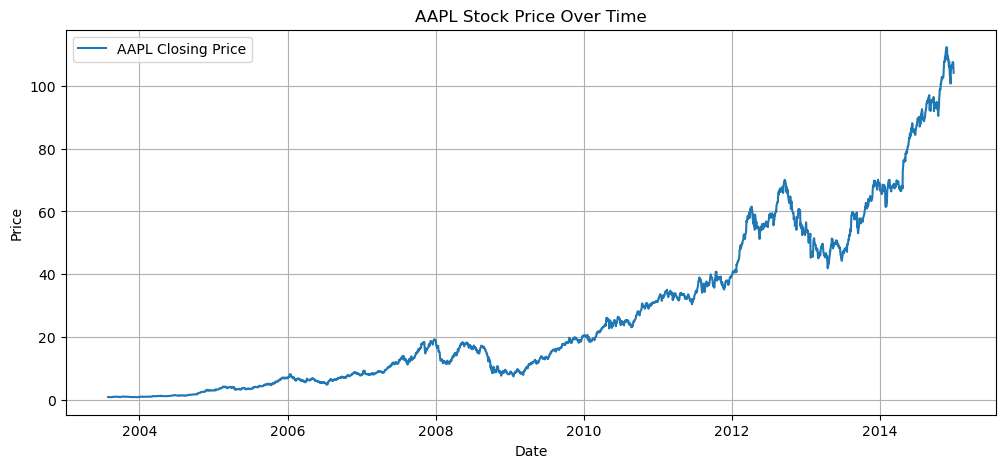

In [25]:
# Step 4: Plot historical stock price trend
plt.figure(figsize=(12,5))
plt.plot(stock_prices['AAPL'], label='AAPL Closing Price')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [26]:
# Step 5: Calculate and plot moving averages
stock_prices['AAPL_MA_20'] = stock_prices['AAPL'].rolling(window=20).mean()  # 20-day moving average
stock_prices['AAPL_MA_50'] = stock_prices['AAPL'].rolling(window=50).mean()  # 50-day moving average

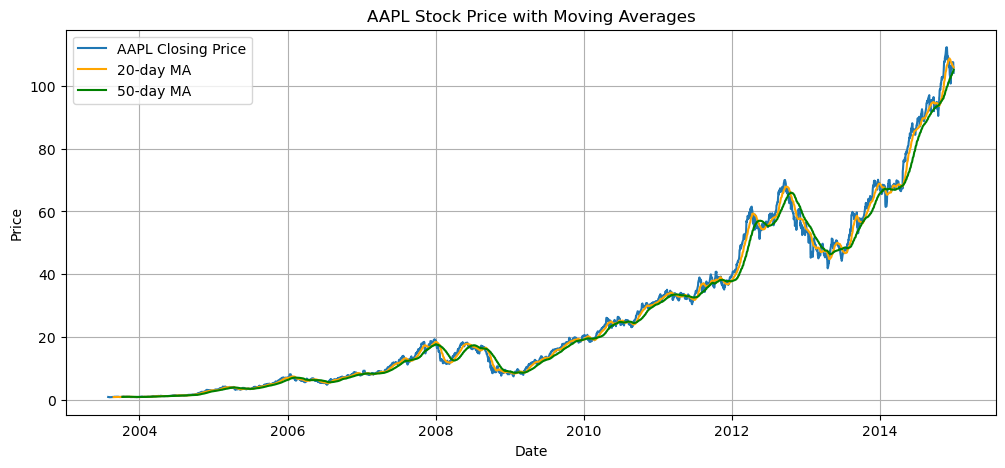

In [28]:
plt.figure(figsize=(12,5))
plt.plot(stock_prices['AAPL'], label='AAPL Closing Price')
plt.plot(stock_prices['AAPL_MA_20'], label='20-day MA', color='orange')
plt.plot(stock_prices['AAPL_MA_50'], label='50-day MA', color='green')
plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

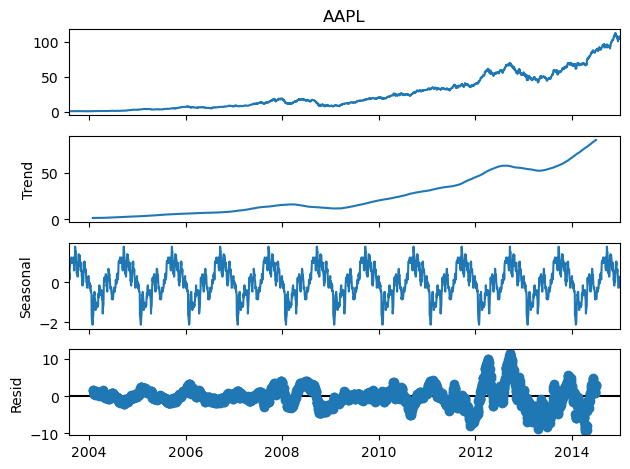

In [31]:
# Step 6: Seasonality analysis using decomposition
decomposition = seasonal_decompose(stock_prices['AAPL'], model='additive', period=252)  # approx 1 trading year
decomposition.plot()
plt.show()